<h2><center>Developed by : Sushil Kumar</center></h2>

## PAPER • OPEN ACCESS
### Visualization of Google Mobility Data for Provinces in Indonesia using Seaborn Python Programming Package

**R Aurachman**
*Telkom University, street Telekomunikasi Number 1, Bandung, Indonesia*
*E-mail: rioaurachman@telkomuniversity.ac.id*

**Abstract:**
One important data needed in handling the COVID-19 pandemic is human mobility data. Based on mobility data provided by Google, analysis can be done as a basis for decision making. This research produces several visualization methods that provide insight to decision makers. Visualization is done using Python Programming.

**1. Introduction:**
The COVID-19 pandemic influences the behavior of the people. One behavior that changes is mobility. Society tends to reduce mobility. Changes in behavior affect economic conditions in an area. The government needs a guide to understand the change in mobility. The knowledge gained can be a reference in making accurate and right decisions. These decisions are taken to mitigate the risks and impacts felt by the community.
Google mobility report releases mobility data. The data records changes in people's behavior, especially mobility during the COVID-19 pandemic. The data provided by Google includes data per province in Indonesia for each date since February. The data does not specifically display mobility figures. The data shown is a mobility value relative to the baseline. The data needs to be interpreted correctly and quickly. One of the tools that can be used is visualization using data processing software that automatically visualizes data according to user needs. It is hoped that with this data, it will provide quick insight to decision makers so that they can make.

**2. Method:**
The data used is COVID-19 Community Mobility Report. The data is in the form of a table that contains mobility data for each country. Some countries are also equipped with data for each region and subregion. The data displayed includes certain dates that are quite complete. Some dates are not available.
Processing data using Python programming. The packages used mainly are Panda and Seaborn. In the initial stage, data preparation is carried out. The initial data has the CSV (Comma Separated Value) format. First, the process of importing data becomes a form of Dataframe. From the dataframe then selected so that a subset of data frames is made specifically for the State of Indonesia. Indonesian dataframes are then processed using a number of basic descriptive statistical techniques and visualized using the available tools.

**3. Result and Discussion:**
Indonesian dataframes are called dfina. The dataframe is then analyzed initially using the dfina.describe() feature. The data needs to be transposed first in order to get a summary for each column in the mobility area.
It can be seen in Table 2 that residential has the largest increase with an average of 8.22 and a standard deviation of 6.96. While the lowest mobility is in Transit Stations which is at -27.9% compared to the baseline.
The next step is to analyze the correlation between mobility data. Correlation is done using the features on the panda package namely .corr (), round (1). Then the visualization is done using a feature in the seaborn package, namely sns.heatmap (). Correlation analysis is performed on World and Indonesian data.

**4. Conclusion:**
Analysis and visualization can be done using Python programming. This was done with the help of the Panda and Seaborn libraries. Several programming lines have been obtained which can later be used to analyze and visualize the same or different data. By analyzing and visualizing it is gained new knowledge and insight in understanding conditions and problems. Knowledge and insight are difficult to obtain if you only see rows of numbers in the data table.
Some development of this research can be done. One of them is to test the correlation of mobility variables with other variables. Can also be compared between several mobility variables between several regions. In addition, evaluation research can also be conducted on a policy that is applied to an area based on changes in mobility that occur.

##  Download and Prep the Data

<h4>Import the libraries needed</h4>

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h4> Load data and store in dataframe </h4>

In [119]:
file_path = 'PS5_Covid_ DataSet.xlsx'

# Load the data set into a DataFrame
data_frame = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
data_frame.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,18:00:00,Kerala,1,0,0,0,1
1,2,2020-01-31,18:00:00,Kerala,1,0,0,0,1
2,3,2020-02-01,18:00:00,Kerala,2,0,0,0,2
3,4,2020-02-02,18:00:00,Kerala,3,0,0,0,3
4,5,2020-02-03,18:00:00,Kerala,3,0,0,0,3


<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [120]:
# Loop through columns and print their data types
for column in data_frame.columns:
    data_type = data_frame[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Column 'Sno' has data type: int64
Column 'Date' has data type: datetime64[ns]
Column 'Time' has data type: object
Column 'State/UnionTerritory' has data type: object
Column 'ConfirmedIndianNational' has data type: object
Column 'ConfirmedForeignNational' has data type: object
Column 'Cured' has data type: int64
Column 'Deaths' has data type: int64
Column 'Confirmed' has data type: int64


# Visualisation

<h4>Fill the missing value for one of the  continous variables with Mean(average) for proper data visualization
<h4>Do Univariate analysis for any 2 numeric variables from the dataset
<br><br>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [121]:
# Let's choose column ConfirmedIndianNational to fill the missing values
# Replace '-' with NaN in the columns
data_frame["ConfirmedIndianNational"].replace('-', np.nan, inplace=True)

# Convert the column to numeric
data_frame["ConfirmedIndianNational"] = pd.to_numeric(data_frame["ConfirmedIndianNational"])

# Calculate the mean of the column
mean_confirmed_indian = data_frame["ConfirmedIndianNational"].mean()

# Fill the missing values with the mean
data_frame["ConfirmedIndianNational"].fillna(mean_confirmed_indian, inplace=True)

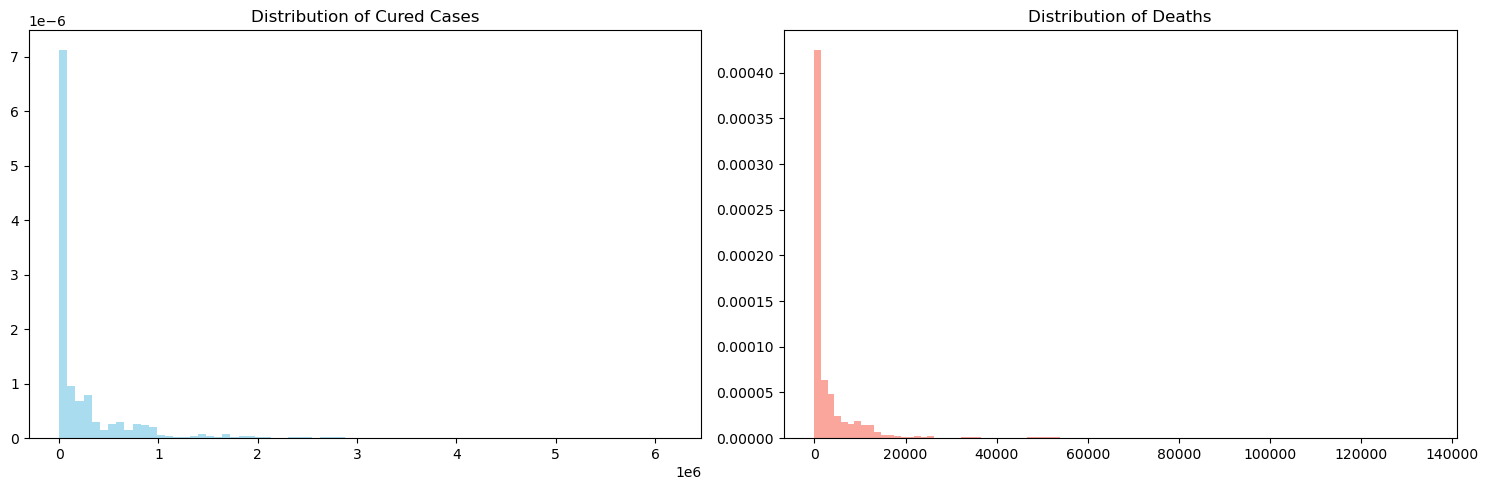

In [115]:
# Univariate analysis of Cured and Deaths columns

# Calculate the optimal bin size
cured_bin_size = 3.5 * np.std(data_frame['Cured']) / (data_frame['Cured'].size ** (1/3))
death_bin_size = 3.5 * np.std(data_frame['Deaths']) / (data_frame['Deaths'].size ** (1/3))

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histograms using the calculated bin sizes
axes[0].hist(data_frame['Cured'], bins=int(np.ceil(data_frame['Cured'].max() / cured_bin_size)), color='skyblue', density=True, alpha=0.7)
axes[0].set_title('Distribution of Cured Cases')

axes[1].hist(data_frame['Deaths'], bins=int(np.ceil(data_frame['Deaths'].max() / death_bin_size)), color='salmon', density=True, alpha=0.7)
axes[1].set_title('Distribution of Deaths')

plt.tight_layout()
plt.show()

In the "Histogram of Cured Cases" chart:
- x-axis variable: Cured Cases
- This chart shows the distribution of values in the 'Cured' column. The x-axis represents the range of 'Cured' cases, and the y-axis represents the frequency of occurrences in each range.

In the "Histogram of Deaths" chart:
- x-axis variable: Deaths
- This chart shows the distribution of values in the 'Deaths' column. The x-axis represents the range of 'Deaths', and the y-axis represents the frequency of occurrences in each range.

### Pre-Attentive Attributes in Histograms

In the histograms presented above, we have employed two pre-attentive attributes – color and size – to enhance the visual perception and focus on specific aspects of the data distribution.

1. **Color (Cured Cases Histogram):** 
   The bars in the 'Distribution of Cured Cases' histogram are shaded with a gentle sky blue color. Color is a powerful pre-attentive attribute that quickly catches the eye. By incorporating color, we aim to draw attention to the distribution of 'Cured' cases. The blue color helps distinguish the bars from the background and emphasizes the frequency of cases across different ranges.

2. **Size (Deaths Cases Histogram):**
   In the 'Distribution of Deaths' histogram, we've adjusted the bin size to be larger, resulting in a bolder and more prominent appearance. By increasing the size of the bins, we intend to accentuate the individual intervals in the distribution. Larger bins make it easier to identify the relative frequency of cases within each interval. This size variation serves as a pre-attentive attribute that directs the viewer's attention to the granularity of the data distribution.

Pre-attentive attributes are strategically employed to efficiently convey specific insights while minimizing cognitive load. By carefully choosing color and size, we enhance the effectiveness of these visualizations, making it easier for viewers to comprehend the distribution of 'Cured' and 'Deaths' cases.

### Gestalt Principles Used

1. **Proximity:**
   Objects placed close to each other are perceived as related. In the histogram, this is seen in the arrangement of bars along the x-axis. The grouping of adjacent bars helps viewers understand data distribution in specific ranges.

2. **Similarity:**
   Similar visual elements, like color and shape, indicate relatedness. In the histograms, bars of the same color and shape represent data points within a certain range. This similarity aids in quickly comprehending data distribution.

Write the python code in the below cell to create appropriate visual to perform the above task.
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [1]:
# Calculate the correlation coefficient
correlation_coefficient = data_frame['Cured'].corr(data_frame['Deaths'])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_frame['Cured'], y=data_frame['Deaths'], color='blue', alpha=0.7)
plt.title(f'Scatter Plot of Cured vs Deaths\nCorrelation: {correlation_coefficient:.2f}')
plt.xlabel('Cured Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.show()

NameError: name 'data_frame' is not defined

1. **Proximity:** Elements that are close to each other are perceived as related. In the scatterplot, this principle helps us identify clusters or patterns among data points representing 'Cured' and 'Deaths'.

2. **Similarity:** Elements with similar visual traits, like color and shape, are seen as belonging to the same group. The consistent use of the 'blue' color and circular markers makes all data points visually cohesive in the scatterplot.

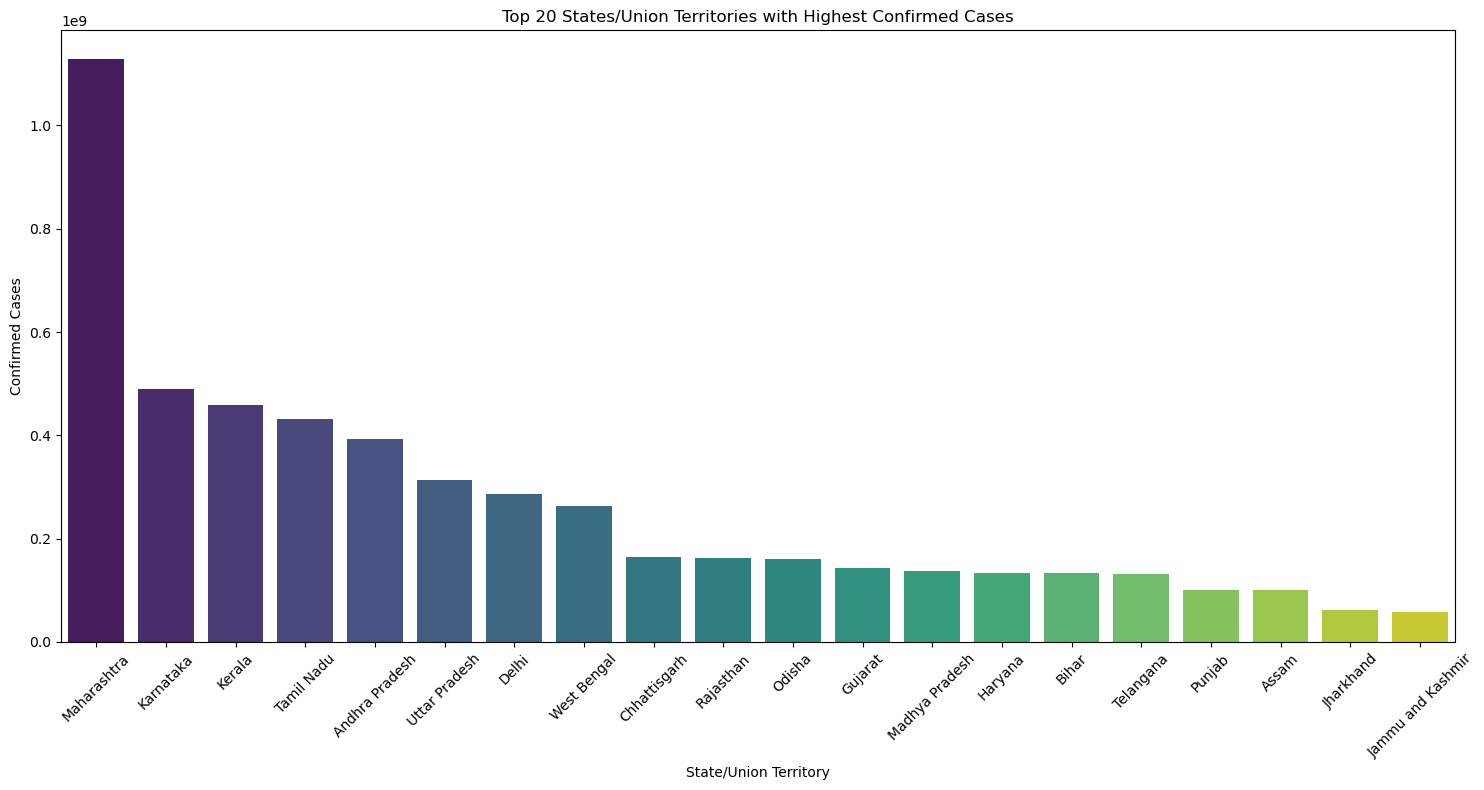

In [104]:
# This plot provides confirmed cases per state/union territory

# Group the data by State/UnionTerritory and calculate the total confirmed cases for each
state_confirmed = data_frame.groupby('State/UnionTerritory')['Confirmed'].sum().reset_index()

# Sort the data by total confirmed cases in descending order
sorted_states = state_confirmed.sort_values(by='Confirmed', ascending=False)

# Select the top 20 states/union territories
top_10_states = sorted_states.head(20)

plt.figure(figsize=(15, 8))
sns.barplot(x=top_10_states['State/UnionTerritory'], y=top_10_states['Confirmed'], palette='viridis')
plt.title('Top 20 States/Union Territories with Highest Confirmed Cases')
plt.xlabel('State/Union Territory')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Selection of Scatter Plot for Correlation Analysis

The scatter plot was chosen to visualize the correlation between 'Cured' and 'Deaths' columns due to the following reasons:

- **Compatibility**: Scatter plots are well-suited for two continuous variables like 'Cured' and 'Deaths'.

- **Correlation Insight**: They provide an immediate sense of correlation direction and strength.

- **Outlier Detection**: Scatter plots help identify outliers, important for accurate correlation interpretation.

- **Visual Appeal**: They offer a visually engaging overview of data distribution and patterns.

- **Correlation Coefficient**: Scatter plots can be paired with correlation coefficient for quantitative assessment.

In conclusion, the scatter plot is ideal to understand the relationship between 'Cured' and 'Deaths'.

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

#### Question: What is the overall trend of the confirmed COVID-19 cases and cured cases over time?

**Answer:**
We can plot a line chart where the x-axis represents the dates and the y-axis represents the number of confirmed cases and cured cases. This chart will provide an easy-to-understand visual representation of how the number of cases and recoveries have evolved over time.

<Figure size 1000x600 with 0 Axes>

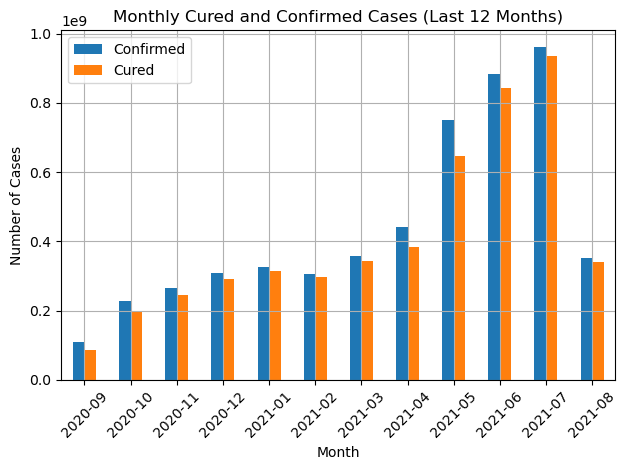

In [117]:
# Python code for chosen question 

# Replace '-' with NaN in the columns
data_frame["Cured"].replace('-', np.nan, inplace=True)
data_frame["Confirmed"].replace('-', np.nan, inplace=True)

# Convert the columns to numeric
data_frame["Cured"] = pd.to_numeric(data_frame["Cured"])
data_frame["Confirmed"] = pd.to_numeric(data_frame["Confirmed"])

# Convert the 'Date' column to datetime
data_frame["Date"] = pd.to_datetime(data_frame["Date"])

# Filter data for the latest 12 months
latest_12_months = data_frame[data_frame["Date"] >= data_frame["Date"].max() - pd.DateOffset(months=11)].copy()

# Create a new column for the month
latest_12_months["Month"] = latest_12_months["Date"].dt.to_period('M')

# Group data by month and sum the counts
monthly_counts = latest_12_months.groupby("Month")[["Cured", "Confirmed"]].sum()

# Create a double bar chart
plt.figure(figsize=(10, 6))
monthly_counts[["Confirmed", "Cured"]].plot(kind='bar')

plt.title('Monthly Cured and Confirmed Cases (Last 12 Months)')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(["Confirmed", "Cured"])
plt.grid(True)

plt.tight_layout()
plt.show()

#### Summary of Visual Analysis

The double bar chart comparing the monthly counts of confirmed and cured COVID-19 cases over the last 12 months reveals intriguing insights:

- The lengths of the confirmed and cured bars are almost equal for each month, indicating that a significant proportion of the confirmed cases have been successfully treated and cured.
- This suggests an effective healthcare system managing COVID-19 cases, resulting in a relatively high recovery rate.
- The consistent lengths of the bars across the months suggest a steady trend of successful recoveries relative to the number of new confirmed cases.

#### Selection of Double Bar Chart for Analyzing Monthly Cured and Confirmed COVID-19 Cases

The choice of a double bar chart for visualizing the monthly counts of cured and confirmed COVID-19 cases is driven by several considerations:

1. **Comparison of Two Categories:** A double bar chart is an effective choice when we want to compare two distinct categories (in this case, "Confirmed" and "Cured") across different time periods (months). It allows for easy comparison of the counts of these two categories side by side.

2. **Clarity and Readability:** The use of distinct bars for each category enhances clarity and readability, making it straightforward for viewers to differentiate between confirmed and cured cases for each month.

3. **Relative Proportions:** The length of the bars in a double bar chart provides a clear visual representation of the relative proportions of confirmed and cured cases for each month. In this case, when the bars are nearly equal in length, it indicates that a significant portion of confirmed cases got cured.

4. **Temporal Trends:** The chronological arrangement of months on the x-axis aids in identifying any temporal trends or patterns in the data. Viewers can quickly identify if there are any consistent changes in the proportions of confirmed and cured cases over time.

5. **Effective Communication:** Double bar charts are widely recognized and understood, making them a suitable choice for communicating data-driven insights to a broad audience, including those without advanced data analysis skills.

6. **Highlighting Recovery Rate:** The comparison of confirmed and cured cases in this chart type naturally highlights the recovery rate, which is an essential metric in evaluating the effectiveness of healthcare interventions and treatment protocols.

In conclusion, the double bar chart is chosen for its ability to effectively compare and communicate the monthly counts of confirmed and cured COVID-19 cases, emphasize the recovery rate, and facilitate the identification of temporal trends. It presents data in a visually clear and intuitive manner, making it suitable for a broad audience, including policymakers, healthcare professionals, and the general public.

#### pre-attentive attriutes used in the stacked bar chart :

1. **Color:** Different shades of color are used to represent "Cured" and "Confirmed" cases, allowing viewers to quickly distinguish between the two categories.

2. **Length:** The length of each stacked bar corresponds to the total count of cases for a particular month, helping in the comparative analysis of the magnitudes of cured and confirmed cases.

#### Gestalt Principles Used in the Chart:

1. **Similarity:**
   The chart utilizes the principle of similarity by employing consistent colors for the "Cured" and "Confirmed" cases. This color uniformity enhances the visual grouping of similar data, enabling a swift differentiation between the two categories.

2. **Proximity:**
   The principle of proximity is applied by arranging the bars representing the same month in close proximity along the x-axis. This spatial arrangement visually connects related data points and facilitates effortless comparison between "Cured" and "Confirmed" cases for each month.

Employing these Gestalt principles enhances the chart's clarity and perceptual organization, making it easier for viewers to understand the data relationships at a glance.